# Script #2

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
papers = pd.read_csv("papers_data_country_ed_2102018.txt", sep="\t")

## Número de itens por revista

In [3]:
top_journals = pd.DataFrame(papers["Journal"].value_counts().head(5)).reset_index()
top_journals

,index,Journal
0,International journal of systematic and evolut...,7578
1,Antonie van Leeuwenhoek,656
2,Systematic and applied microbiology,296
3,"Journal of microbiology (Seoul, Korea)",156
4,Current microbiology,154


In [4]:
top_journals.columns = ["Name", "Frequency"]

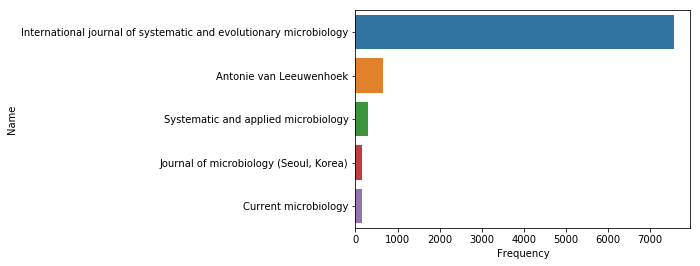

In [5]:
sns.barplot(x='Frequency', y='Name', data=top_journals)

## Número de itens por revista por ano 

In [6]:
per_year = papers["Year"].value_counts()

In [7]:
per_year = pd.DataFrame(papers["Year"].value_counts().reset_index())
per_year.columns = ['year', 'count']
per_year = per_year.sort_values(by="year")

In [12]:
df_not_top = papers[(papers["Journal"] != "International journal of systematic and evolutionary microbiology")] #todas menos IJSEM

In [9]:
df_not_top_by_year = df_not_top.groupby(["Year"])

In [10]:
df_count_year_not_top = pd.DataFrame(df_not_top_by_year.describe())["Article Title"]["count"]

In [11]:
df_count_year_not_top = pd.DataFrame(df_count_year_not_top).reset_index()
df_count_year_not_top.columns = ['year', 'count']
df_count_year_not_top["count"] = df_count_year_not_top["count"].astype("int64")

In [15]:
ijsem = papers[papers["Journal"] == "International journal of systematic and evolutionary microbiology"] #IJSEM

In [16]:
ijsem_year = pd.DataFrame(ijsem["Year"].value_counts().reset_index())
ijsem_year.columns = ['year', 'count']
ijsem_year = ijsem_year.sort_values(by="year").reset_index(drop=True)

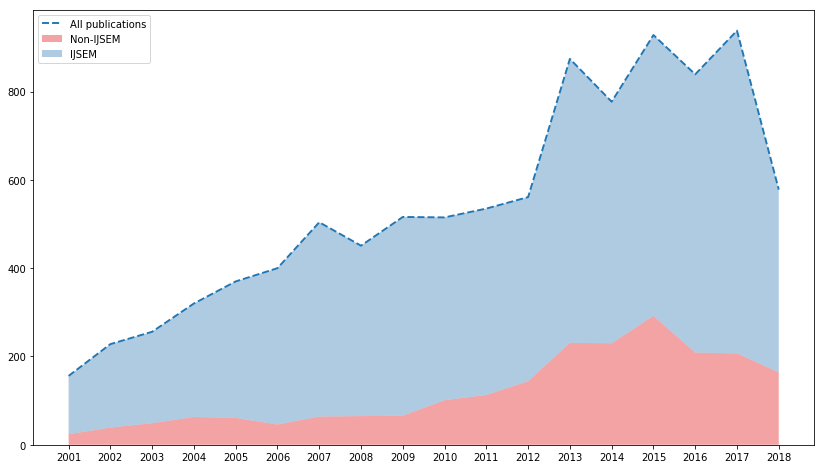

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(14,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
pal = sns.color_palette("Set1")
plt.xticks(ijsem_year["year"])
plt.plot(per_year['year'], per_year['count'], linewidth=1.9, label="All publications", ls="dashed")
plt.stackplot(ijsem_year["year"], df_count_year_not_top["count"], ijsem_year["count"], labels=['Non-IJSEM','IJSEM'], colors=pal, alpha=0.4)
plt.legend(loc='upper left')